## <center> UAS BIOSIBERNETIKA <center>
**<center> Speech Emotion Recognition (SER) <center>**

<center> Rosyiidah Dhiya'Ulhaq (19/446468/TK/49573) <center>

__[Link GDrive Dataset](https://bit.ly/DatasetBiosibernetika_446468)__


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Library yang dipakai**

In [ ]:
# Import libraries

# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras import losses, models, optimizers
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, Input, Flatten, Dropout, Activation, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from keras.activations import relu, softmax
from keras.layers import Convolution2D, GlobalAveragePooling2D, GlobalMaxPool2D, MaxPool2D, concatenate

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob
import os
import pickle
import IPython.display as ipd  # To play sound in the notebook
import sys
from tqdm import tqdm, tqdm_pandas
import scipy
from scipy.stats import skew
import warnings
# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

### **Data Preparation**

In [ ]:
# Directory path to dataset

RAV = "/content/drive/MyDrive/biosibernetika/ravdess/"
CREMA = "/content/drive/MyDrive/biosibernetika/cremad/"
TESS = "/content/drive/MyDrive/biosibernetika/toronto-emotional-speech-set-tess/"
SAVEE = "/content/drive/MyDrive/biosibernetika/surrey-audiovisual-expressed-emotion-savee/"

**1. RAVDESS Dataset**

In [ ]:
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for f in dir_list:
  part = f.split('.')[0].split('-')
  emotion.append(int(part[2]))
  temp = int(part[6])
  if temp%2 == 0:
    gen = "female"
  else:
    gen = "male"
  gender.append(gen)
  path.append(RAV + f)


RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

male_calm          96
female_calm        96
male_happy         96
female_happy       96
male_sad           96
female_sad         96
male_angry         96
female_angry       96
male_fear          96
female_fear        96
male_disgust       96
female_disgust     96
male_surprise      96
female_surprise    96
male_neutral       48
female_neutral     48
Name: labels, dtype: int64



> Explore the data



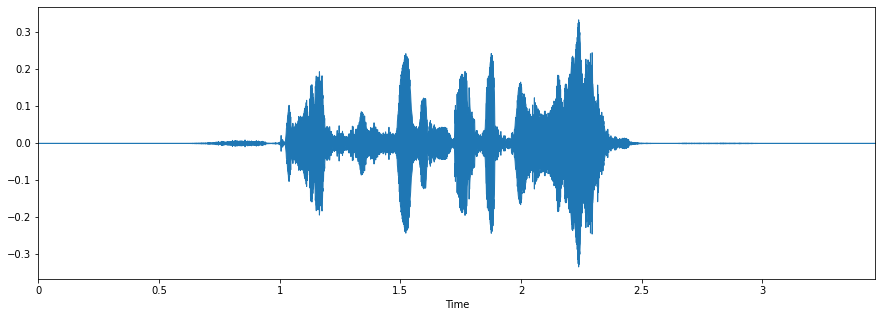

In [ ]:
# Fearful track
fname = RAV + '03-01-06-02-02-02-14.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Play the audio
ipd.Audio(fname)

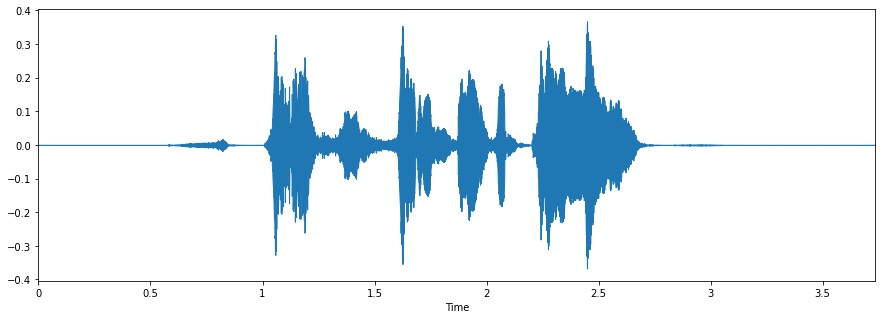

In [ ]:
# Happy track
fname = RAV + '03-01-03-02-02-02-14.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Play the audio
ipd.Audio(fname)

**2. CREMA Dataset**

In [ ]:
dir_list = os.listdir(CREMA)
dir_list.sort()

gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list:
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)

CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

male_happy        672
male_sad          672
male_angry        671
male_disgust      671
male_fear         671
female_angry      602
female_disgust    601
female_fear       601
female_happy      601
female_sad        601
male_neutral      576
female_neutral    513
Name: labels, dtype: int64



> Explore the data



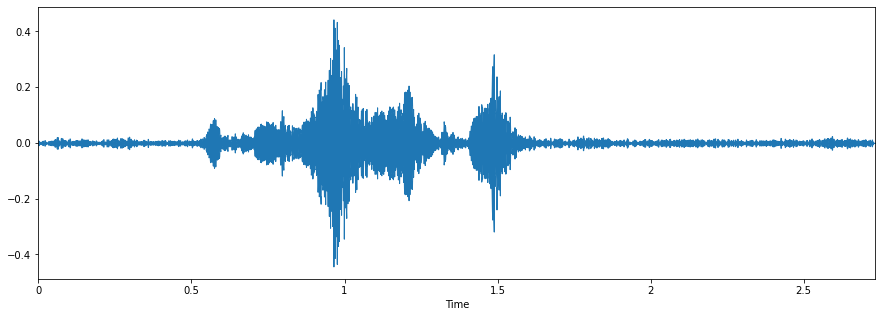

In [ ]:
# Happy track
fname = CREMA + '1012_IEO_HAP_HI.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Play the audio
ipd.Audio(fname)

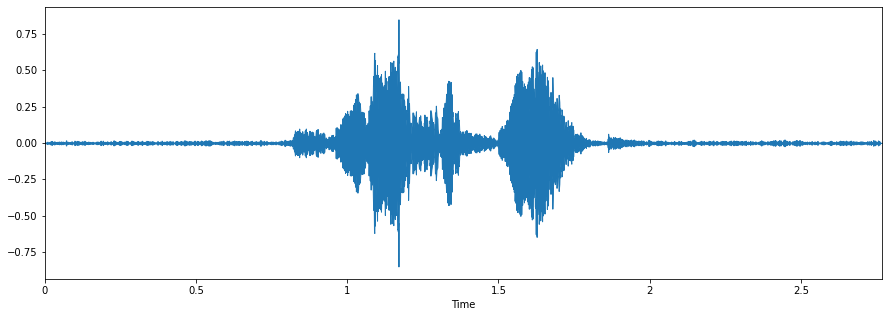

In [ ]:
# Fearful track
fname = CREMA + '1012_IEO_FEA_HI.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Play the audio
ipd.Audio(fname)

**3. TESS Dataset**

In [ ]:
dir_list = os.listdir(TESS)
dir_list.sort()

path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

female_fear        400
female_surprise    400
female_sad         400
female_angry       400
female_disgust     400
female_happy       400
female_neutral     400
Name: labels, dtype: int64



> Explore the data



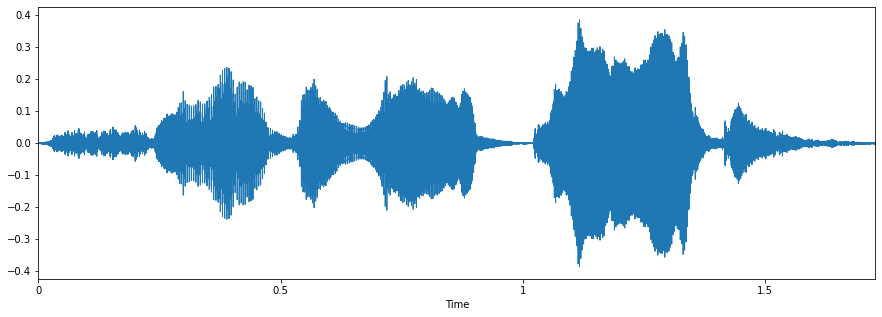

In [ ]:
# Fearful track
fname = TESS + 'YAF_fear/YAF_dog_fear.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Play the audio
ipd.Audio(fname)

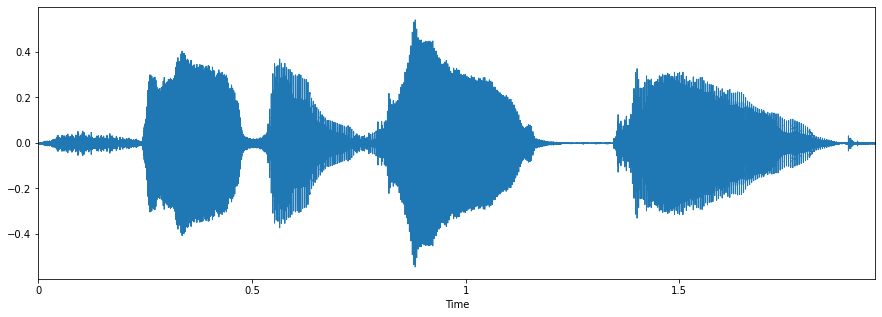

In [ ]:
# Happy track
fname =  TESS + 'YAF_happy/YAF_dog_happy.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Play the audio
ipd.Audio(fname)

**4. SAVEE Dataset**

In [ ]:
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error')
    path.append(SAVEE + i)

SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

male_neutral     120
male_angry        60
male_disgust      60
male_fear         60
male_happy        60
male_sad          60
male_surprise     60
Name: labels, dtype: int64



> Explore the data



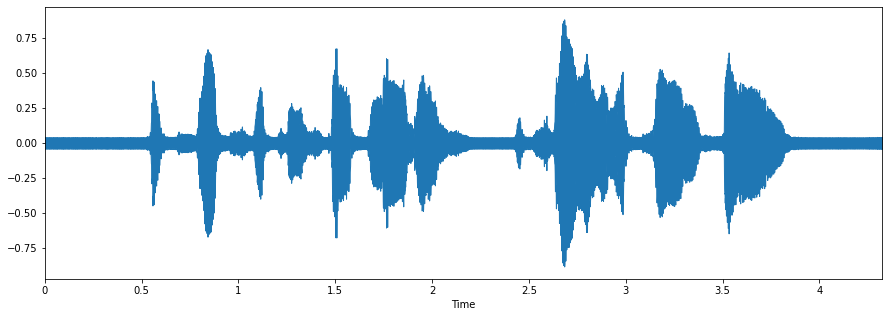

In [ ]:
# Fearful track
fname = SAVEE + 'DC_f11.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Play the audio
ipd.Audio(fname)

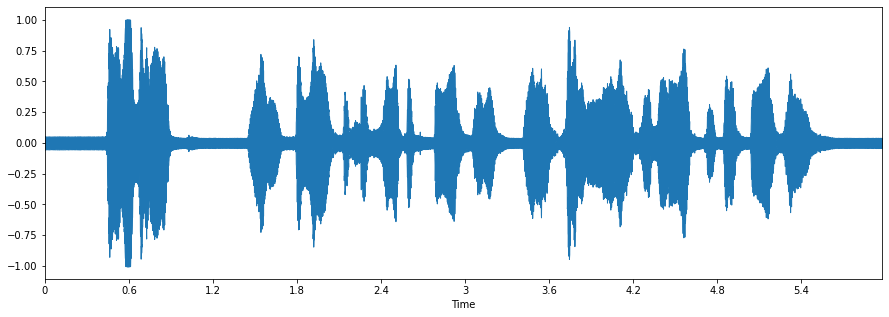

In [ ]:
# Happy track
fname = SAVEE + 'DC_h11.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Play the audio
ipd.Audio(fname)

**Creating Dataframe using all the 4 dataframes**

In [ ]:
# Creating Dataframe using all the 4 dataframe

df = pd.concat([SAVEE_df, RAV_df, TESS_df, CREMA_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path2.csv",index=False)

female_angry       1098
female_happy       1097
female_sad         1097
female_fear        1097
female_disgust     1097
female_neutral      961
male_happy          828
male_sad            828
male_angry          827
male_disgust        827
male_fear           827
male_neutral        744
female_surprise     496
male_surprise       156
male_calm            96
female_calm          96
Name: labels, dtype: int64


### **Statistical features**

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=12)
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
    librosa.display.waveplot(X, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=12)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

def mfcc_spec(data, sr, e):
    X = librosa.stft(data)
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
    mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
    plt.figure(figsize=(12, 3))
    plt.title('MFCC for audio with {} emotion'.format(e), size=12)
    librosa.display.specshow(mfcc, sr=sr, x_axis='time')
    plt.ylabel('MFCC')
    plt.colorbar()

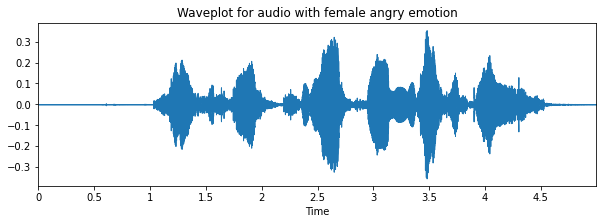

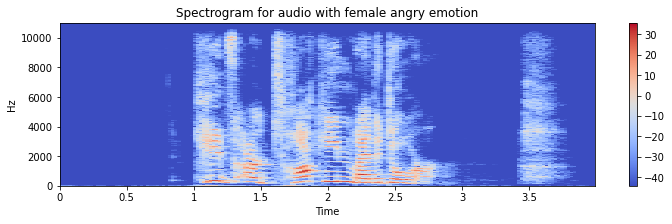

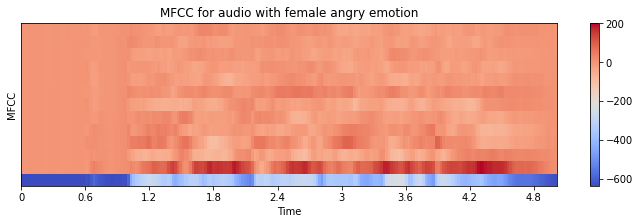

In [ ]:
# Source - RAVDESS; Gender - Female; Emotion - Angry
emotion='female angry'
path = "/content/drive/MyDrive/biosibernetika/ravdess/03-01-05-02-01-01-08.wav"
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
mfcc_spec(data, sampling_rate, emotion)
ipd.Audio(path)

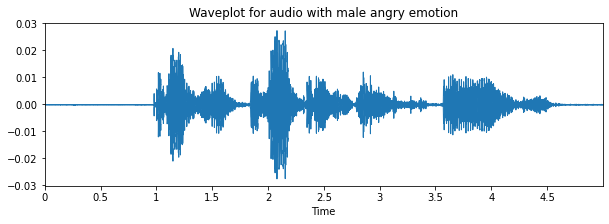

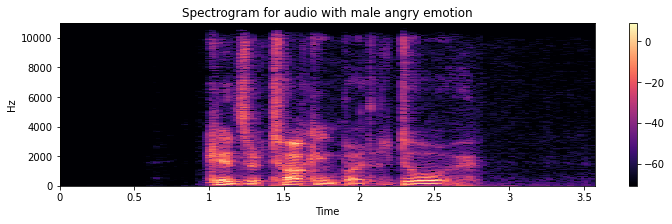

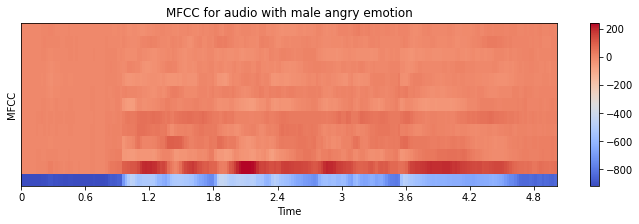

In [ ]:
# Source - RAVDESS; Gender - Male; Emotion - Angry
emotion='male angry'
path = "/content/drive/MyDrive/biosibernetika/ravdess/03-01-05-01-01-01-09.wav"
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
mfcc_spec(data, sampling_rate, emotion)
ipd.Audio(path)

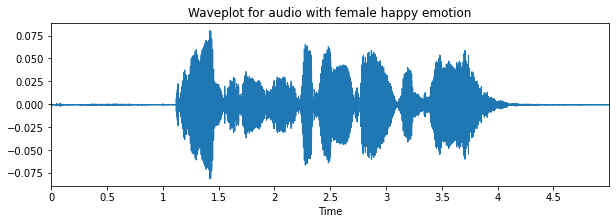

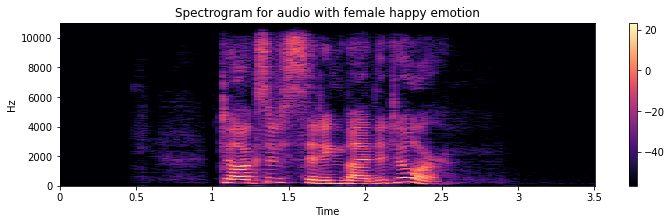

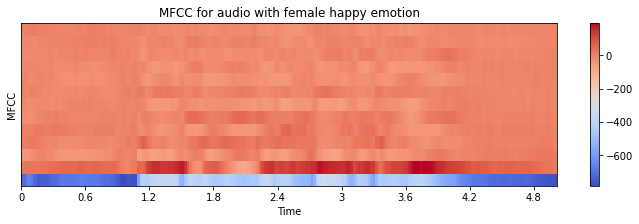

In [ ]:
# Source - RAVDESS; Gender - Female; Emotion - Happy
emotion='female happy'
path = "/content/drive/MyDrive/biosibernetika/ravdess/03-01-03-01-02-01-12.wav"
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
mfcc_spec(data, sampling_rate, emotion)
ipd.Audio(path)

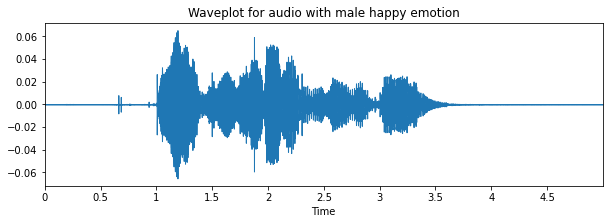

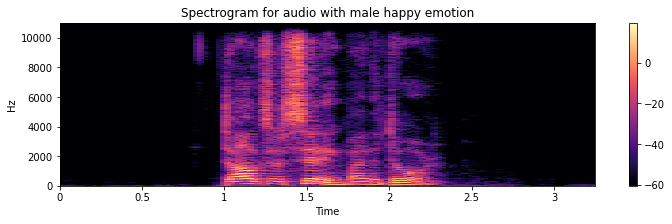

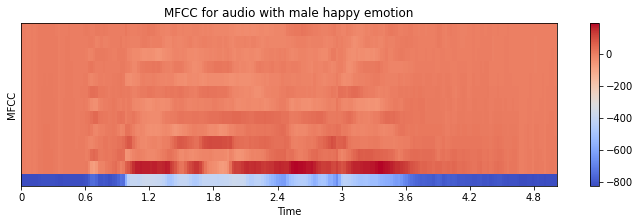

In [ ]:
# Source - RAVDESS; Gender - Male; Emotion - Happy
emotion='male happy'
path = "/content/drive/MyDrive/biosibernetika/ravdess/03-01-03-01-02-02-11.wav"
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
mfcc_spec(data, sampling_rate, emotion)
ipd.Audio(path)

216
216


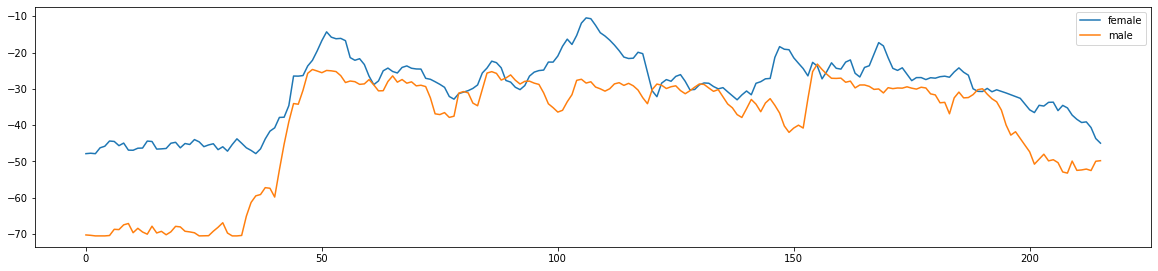

In [ ]:
# Source - RAVDESS; Gender - Female; Emotion - Angry
path = "/content/drive/MyDrive/biosibernetika/ravdess/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - Angry
path = "/content/drive/MyDrive/biosibernetika/ravdess/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

216
216


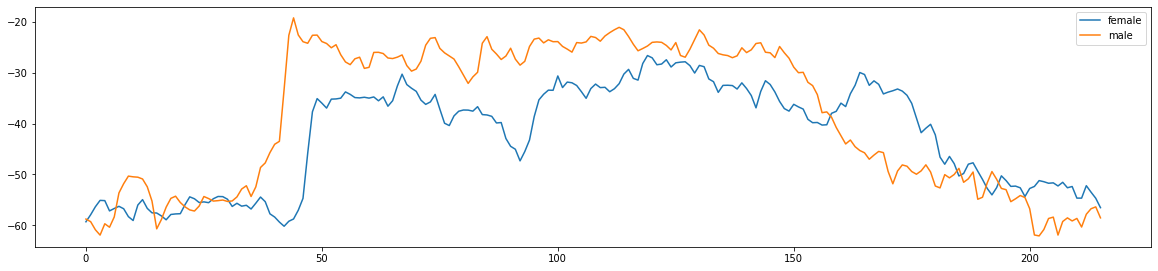

In [ ]:
# Source - RAVDESS; Gender - Female; Emotion - happy
path = "/content/drive/MyDrive/biosibernetika/ravdess/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - happy
path = "/content/drive/MyDrive/biosibernetika/ravdess/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

### **Data Processing**

In [ ]:
ref = pd.read_csv("/content/Data_path2.csv")
ref.head()

labels source                                               path
0  male_angry  SAVEE  /content/drive/MyDrive/biosibernetika/surrey-a...
1  male_angry  SAVEE  /content/drive/MyDrive/biosibernetika/surrey-a...
2  male_angry  SAVEE  /content/drive/MyDrive/biosibernetika/surrey-a...
3  male_angry  SAVEE  /content/drive/MyDrive/biosibernetika/surrey-a...
4  male_angry  SAVEE  /content/drive/MyDrive/biosibernetika/surrey-a...

In [ ]:
df = pd.DataFrame(columns=['feature'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast', duration=2.5, sr=44100, offset=0.5)
    sample_rate = np.array(sample_rate)

    # mean as the feature. Could do min and max etc as well.
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1
    print(counter, mfccs)

# Check a few records to make sure its processed successfully
print(len(df))
df.head()

Streaming output truncated to the last 5000 lines.
 -12.462676  -13.488154  -18.66991   -19.48301   -17.91027   -17.780079
 -16.21534   -14.9421    -17.089352  -15.575193  -14.21405   -16.523024
 -18.878218  -18.010777  -20.44088   -19.180584  -16.534636  -17.409027
 -18.394945  -19.099163  -17.783596  -14.274161  -14.938259  -15.206585
 -14.43984   -14.272524  -16.223162  -18.015251  -19.383509  -17.740032
 -19.274027  -21.092031  -21.97481   -20.329124  -21.760418  -25.539146
 -24.016111  -20.755726  -19.784206  -20.878885  -21.573193  -19.594944
 -18.591547  -18.144295  -18.643684  -20.529915  -19.551298  -19.815443
 -20.572954  -18.613468  -18.62836   -21.683119  -24.494923  -23.084349
 -21.073656  -21.744081  -21.958065  -20.244032  -21.011288  -21.365116
 -23.434334  -25.480232  -30.098698 ]
12001 [-24.58786   -23.906925  -22.965471  -22.504965  -21.44515   -19.73051
 -18.851759  -20.232124  -21.519197  -22.750456  -20.775421  -20.874857
 -17.850723  -17.023563  -16.667763  -16.9

feature
0  [-1.5298388, -4.333437, -12.285237, -13.083024...
1  [-27.551817, -25.248302, -22.91287, -23.200481...
2  [-3.311602, -6.204092, -13.791662, -11.645019,...
3  [-27.40101, -24.815685, -24.262352, -24.282555...
4  [-25.975302, -22.8251, -21.225157, -20.821096,...

In [ ]:
# save it
df.to_pickle('my4EmotionDatabases-mfccs')

# load it
df = pd.read_pickle('my4EmotionDatabases-mfccs')
df.head()

feature
0  [-1.5298388, -4.333437, -12.285237, -13.083024...
1  [-27.551817, -25.248302, -22.91287, -23.200481...
2  [-3.311602, -6.204092, -13.791662, -11.645019,...
3  [-27.40101, -24.815685, -24.262352, -24.282555...
4  [-25.975302, -22.8251, -21.225157, -20.821096,...

In [ ]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df[:5]

labels source                                               path  \
0  male_angry  SAVEE  /content/drive/MyDrive/biosibernetika/surrey-a...   
1  male_angry  SAVEE  /content/drive/MyDrive/biosibernetika/surrey-a...   
2  male_angry  SAVEE  /content/drive/MyDrive/biosibernetika/surrey-a...   
3  male_angry  SAVEE  /content/drive/MyDrive/biosibernetika/surrey-a...   
4  male_angry  SAVEE  /content/drive/MyDrive/biosibernetika/surrey-a...   

           0          1          2          3          4          5  \
0  -1.529839  -4.333437 -12.285237 -13.083024 -12.041327 -11.819769   
1 -27.551817 -25.248302 -22.912870 -23.200481 -24.561083 -24.916075   
2  -3.311602  -6.204092 -13.791662 -11.645019 -10.858610 -11.128167   
3 -27.401011 -24.815685 -24.262352 -24.282555 -24.520842 -25.730690   
4 -25.975302 -22.825100 -21.225157 -20.821096 -19.913891 -20.578136   

           6  ...        206        207        208        209        210  \
0  -9.414148  ...        NaN        NaN        NaN        NaN        NaN   
1 -24.402773  ... -24.826651 -24.333981 -24.204630 -24.982929 -24.918049   
2 -10.862832  ...        NaN        NaN        NaN        NaN        NaN   
3 -24.697758  ... -15.147532 -16.160828 -14.809646  -9.527517  -8.058397   
4 -22.024477  ...        NaN        NaN        NaN        NaN        NaN   

         211        212        213        214        215  
0        NaN        NaN        NaN        NaN        NaN  
1 -26.273071 -26.806255 -27.242727 -26.979715 -27.205202  
2        NaN        NaN        NaN        NaN        NaN  
3  -6.943917  -6.432022  -5.842372  -4.964907  -2.094145  
4        NaN        NaN        NaN        NaN        NaN  

[5 rows x 219 columns]

In [ ]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(12172, 219)


labels source                                               path  \
0  male_angry  SAVEE  /content/drive/MyDrive/biosibernetika/surrey-a...   
1  male_angry  SAVEE  /content/drive/MyDrive/biosibernetika/surrey-a...   
2  male_angry  SAVEE  /content/drive/MyDrive/biosibernetika/surrey-a...   
3  male_angry  SAVEE  /content/drive/MyDrive/biosibernetika/surrey-a...   
4  male_angry  SAVEE  /content/drive/MyDrive/biosibernetika/surrey-a...   

           0          1          2          3          4          5  \
0  -1.529839  -4.333437 -12.285237 -13.083024 -12.041327 -11.819769   
1 -27.551817 -25.248302 -22.912870 -23.200481 -24.561083 -24.916075   
2  -3.311602  -6.204092 -13.791662 -11.645019 -10.858610 -11.128167   
3 -27.401011 -24.815685 -24.262352 -24.282555 -24.520842 -25.730690   
4 -25.975302 -22.825100 -21.225157 -20.821096 -19.913891 -20.578136   

           6  ...        206        207        208        209        210  \
0  -9.414148  ...   0.000000   0.000000   0.000000   0.000000   0.000000   
1 -24.402773  ... -24.826651 -24.333981 -24.204630 -24.982929 -24.918049   
2 -10.862832  ...   0.000000   0.000000   0.000000   0.000000   0.000000   
3 -24.697758  ... -15.147532 -16.160828 -14.809646  -9.527517  -8.058397   
4 -22.024477  ...   0.000000   0.000000   0.000000   0.000000   0.000000   

         211        212        213        214        215  
0   0.000000   0.000000   0.000000   0.000000   0.000000  
1 -26.273071 -26.806255 -27.242727 -26.979715 -27.205202  
2   0.000000   0.000000   0.000000   0.000000   0.000000  
3  -6.943917  -6.432022  -5.842372  -4.964907  -2.094145  
4   0.000000   0.000000   0.000000   0.000000   0.000000  

[5 rows x 219 columns]

In [ ]:
# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1), df.labels, test_size=0.25, shuffle=True, random_state=42)

# Lets see how the data present itself before normalisation
X_train[150:160]

0          1          2          3          4          5    \
9462  -14.518860 -15.837305 -14.179218 -15.322209 -14.035509 -15.350738   
2400  -18.795885 -22.413967 -31.836454 -31.779491 -31.019741 -30.085060   
4900  -20.602652 -22.965343 -23.860119 -22.105154 -21.313742 -22.729418   
4147  -15.955115 -19.016012 -22.618181 -23.655138 -24.140373 -23.453352   
4467  -17.324026 -21.403666 -29.617174 -30.286089 -33.001846 -34.659817   
9265  -15.935989 -18.298458 -17.769939 -17.662331 -17.459856 -15.909712   
5095  -23.907681 -22.752394 -23.120342 -22.647556 -23.080828 -26.300547   
11596 -20.598438 -21.555363 -20.529488 -20.669310 -21.171085 -18.573400   
9142  -18.554800 -18.850513 -18.289454 -18.497530 -18.929253 -18.147158   
11009 -19.440161 -17.279749 -17.961884 -17.747929 -16.585636 -18.029648   

             6          7          8          9    ...        206        207  \
9462  -14.774813 -15.566328 -14.624174 -13.689020  ...   0.000000   0.000000   
2400  -30.153639 -29.439589 -31.192230 -32.559776  ...   0.000000   0.000000   
4900  -22.060194 -21.166527 -21.188072 -19.295713  ...   0.000000   0.000000   
4147  -22.771496 -22.185469 -22.671694 -22.314068  ...   0.000000   0.000000   
4467  -36.788246 -39.774494 -41.863075 -42.002068  ...   0.000000   0.000000   
9265  -16.094517 -16.833349 -17.267675 -17.322308  ...   0.000000   0.000000   
5095  -25.361757 -24.673979 -24.255323 -23.107952  ... -23.340071 -21.190517   
11596 -18.412350 -16.178038 -14.222460 -15.122539  ...   0.000000   0.000000   
9142  -17.576231 -17.455301 -17.576540 -17.922741  ...   0.000000   0.000000   
11009 -18.104063 -16.027079 -16.660450 -17.287010  ... -18.957901 -20.998066   

             208        209        210        211        212        213  \
9462    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
2400    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
4900    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
4147    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
4467    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
9265    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
5095  -21.726530 -24.220421 -23.979763 -22.325605 -20.762571 -22.112598   
11596   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
9142    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
11009 -20.725838 -20.826099 -17.875004 -15.417756 -14.674922 -16.452705   

             214        215  
9462    0.000000   0.000000  
2400    0.000000   0.000000  
4900    0.000000   0.000000  
4147    0.000000   0.000000  
4467    0.000000   0.000000  
9265    0.000000   0.000000  
5095  -22.931988 -22.601694  
11596   0.000000   0.000000  
9142    0.000000   0.000000  
11009 -17.946007 -19.129416  

[10 rows x 216 columns]

In [ ]:
# Lts do data normalization
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Check the dataset now
X_train[150:160]

0         1         2         3         4         5         6    \
9462   0.470832  0.431919  0.753011  0.660204  0.746432  0.644432  0.678655   
2400   0.172067 -0.045702 -0.557635 -0.557664 -0.507411 -0.443388 -0.454711   
4900   0.045858 -0.085745  0.034426  0.158254  0.209124  0.099672  0.141748   
4147   0.370505  0.201070  0.126611  0.043553  0.000451  0.046224  0.089327   
4467   0.274881  0.027670 -0.392904 -0.447150 -0.653738 -0.781137 -0.943658   
9265   0.371841  0.253181  0.486482  0.487031  0.493633  0.603163  0.581397   
5095  -0.185010 -0.070280  0.089337  0.118115  0.078671 -0.163981 -0.101566   
11596  0.046152  0.016653  0.281649  0.264509  0.219656  0.406506  0.410581   
9142   0.188907  0.213089  0.447920  0.425225  0.385157  0.437975  0.472200   
11009  0.127062  0.327163  0.472235  0.480696  0.558172  0.446651  0.433301   

            7         8         9    ...       206       207       208  \
9462   0.613488  0.676573  0.741870  ...  0.538128  0.525004  0.524348   
2400  -0.407422 -0.542071 -0.645493  ...  0.538128  0.525004  0.524348   
4900   0.201379  0.193773  0.329670  ...  0.538128  0.525004  0.524348   
4147   0.126397  0.084647  0.107763  ...  0.538128  0.525004  0.524348   
4467  -1.167951 -1.326953 -1.339683  ...  0.538128  0.525004  0.524348   
9265   0.520250  0.482133  0.474753  ...  0.538128  0.525004  0.524348   
5095  -0.056729 -0.031835  0.049397  ... -0.907832 -0.783086 -0.812664   
11596  0.568474  0.706120  0.636479  ...  0.538128  0.525004  0.524348   
9142   0.474482  0.459415  0.430610  ...  0.538128  0.525004  0.524348   
11009  0.579582  0.526797  0.477348  ... -0.636349 -0.771206 -0.751084   

            209       210       211       212       213       214       215  
9462   0.525076  0.510678  0.510499  0.511099  0.499952  0.495167  0.490696  
2400   0.525076  0.510678  0.510499  0.511099  0.499952  0.495167  0.490696  
4900   0.525076  0.510678  0.510499  0.511099  0.499952  0.495167  0.490696  
4147   0.525076  0.510678  0.510499  0.511099  0.499952  0.495167  0.490696  
4467   0.525076  0.510678  0.510499  0.511099  0.499952  0.495167  0.490696  
9265   0.525076  0.510678  0.510499  0.511099  0.499952  0.495167  0.490696  
5095  -0.957190 -0.955136 -0.850244 -0.746192 -0.835217 -0.895437 -0.873013  
11596  0.525076  0.510678  0.510499  0.511099  0.499952  0.495167  0.490696  
9142   0.525076  0.510678  0.510499  0.511099  0.499952  0.495167  0.490696  
11009 -0.749461 -0.581970 -0.429212 -0.377551 -0.493470 -0.593086 -0.663508  

[10 rows x 216 columns]

In [ ]:
# Lets few preparation steps to get it into the correct format for Keras
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# one hot encode the target
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)

# Pickel the lb object for future use
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

(9129, 216)
['female_angry' 'female_calm' 'female_disgust' 'female_fear'
 'female_happy' 'female_neutral' 'female_sad' 'female_surprise'
 'male_angry' 'male_calm' 'male_disgust' 'male_fear' 'male_happy'
 'male_neutral' 'male_sad' 'male_surprise']


In [ ]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(9129, 216, 1)

### **Data Augmentasi dan Modelling**

In [ ]:
'''
Data Augmentation method
'''
def speedNpitch(data):
    """
    Speed and Pitch Tuning.
    """
    # change low and high here
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.2  / length_change
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data

'''
Extracting the MFCC feature as an image (Matrix format).
'''
def prepare_data(df, n, aug, mfcc):
    X = np.empty(shape=(df.shape[0], n, 216, 1))
    input_length = sampling_rate * audio_duration

    cnt = 0
    for fname in tqdm(df.path):
        file_path = fname
        data, _ = librosa.load(file_path, sr=sampling_rate
                               ,res_type="kaiser_fast"
                               ,duration=2.5
                               ,offset=0.5
                              )

        # Random offset / Padding
        if len(data) > input_length:
            max_offset = len(data) - input_length
            offset = np.random.randint(max_offset)
            data = data[offset:(input_length+offset)]
        else:
            if input_length > len(data):
                max_offset = input_length - len(data)
                offset = np.random.randint(max_offset)
            else:
                offset = 0
            data = np.pad(data, (offset, int(input_length) - len(data) - offset), "constant")

        # Augmentation
        if aug == 1:
            data = speedNpitch(data)

        # MFCC extraction
        MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
        MFCC = np.expand_dims(MFCC, axis=-1)
        X[cnt,] = MFCC

        cnt += 1

    return X


'''
Confusion matrix plot
'''
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



'''
Create the 2D CNN model
'''
def get_2d_conv_model(n):
    ''' Create a standard deep 2D convolutional neural network'''
    nclass = 16
    inp = Input(shape=(n,216,1))  #2D matrix of 30 MFCC bands by 216 audio length.
    x = Convolution2D(32, (4,10), padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)

    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)

    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)

    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)

    x = Flatten()(x)
    x = Dense(64)(x)
    x = Dropout(rate=0.2)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)

    out = Dense(nclass, activation=softmax)(x)
    model = models.Model(inputs=inp, outputs=out)

    opt = optimizers.Adam(0.001)
    model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['acc'])
    return model

'''
Other functions
'''
class get_results:
    def __init__(self, model_history, model ,X_test, y_test, labels):
        self.model_history = model_history
        self.model = model
        self.X_test = X_test
        self.y_test = y_test
        self.labels = labels

    def create_plot(self, model_history):
        '''Check the logloss of both train and validation, make sure they are close and have plateau'''
        plt.plot(model_history.history['loss'])
        plt.plot(model_history.history['val_loss'])

        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

    def create_results(self, model):
        '''predict on test set and get accuracy results'''
        opt = optimizers.Adam(0.001)
        model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
        score = model.evaluate(X_test, y_test, verbose=0)
        print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

    def confusion_results(self, X_test, y_test, labels, model):
        '''plot confusion matrix results'''
        preds = model.predict(X_test, batch_size=16, verbose=2)
        preds=preds.argmax(axis=1)
        preds = preds.astype(int).flatten()
        preds = (lb.inverse_transform((preds)))

        actual = y_test.argmax(axis=1)
        actual = actual.astype(int).flatten()
        actual = (lb.inverse_transform((actual)))

        classes = labels
        classes.sort()

        c = confusion_matrix(actual, preds)
        print_confusion_matrix(c, class_names = classes)



    def accuracy_results_gender(self, X_test, y_test, labels, model):
        '''Print out the accuracy score and confusion matrix heat map of the Gender classification results'''
        preds = model.predict(X_test, batch_size=16, verbose=2)
        preds=preds.argmax(axis=1)
        preds = preds.astype(int).flatten()
        preds = (lb.inverse_transform((preds)))

        actual = y_test.argmax(axis=1)
        actual = actual.astype(int).flatten()
        actual = (lb.inverse_transform((actual)))

        actual = pd.DataFrame(actual).replace({'female_angry':'female'
                   , 'female_disgust':'female'
                   , 'female_fear':'female'
                   , 'female_happy':'female'
                   , 'female_sad':'female'
                   , 'female_surprise':'female'
                   , 'female_neutral':'female'
                   , 'female_calm' : 'female'
                   , 'male_calm' : 'male'
                   , 'male_angry':'male'
                   , 'male_fear':'male'
                   , 'male_happy':'male'
                   , 'male_sad':'male'
                   , 'male_surprise':'male'
                   , 'male_neutral':'male'
                   , 'male_disgust':'male'
                  })
        preds = pd.DataFrame(preds).replace({'female_angry':'female'
               , 'female_disgust':'female'
               , 'female_fear':'female'
               , 'female_happy':'female'
               , 'female_sad':'female'
               , 'female_surprise':'female'
               , 'female_neutral':'female'
               , 'female_calm' : 'female'
               , 'male_calm' : 'male'
               , 'male_angry':'male'
               , 'male_fear':'male'
               , 'male_happy':'male'
               , 'male_sad':'male'
               , 'male_surprise':'male'
               , 'male_neutral':'male'
               , 'male_disgust':'male'
              })

        classes = actual.loc[:,0].unique()
        classes.sort()

        c = confusion_matrix(actual, preds)
        print(accuracy_score(actual, preds))
        print_confusion_matrix(c, class_names = classes)

**MFCC with Augmentation**

In [ ]:
sampling_rate=44100
audio_duration=2.5
n_mfcc = 30
mfcc_aug = prepare_data(ref, n = n_mfcc, aug = 1, mfcc = 1)

100%|██████████| 12172/12172 [10:04<00:00, 20.14it/s]


In [ ]:
# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(mfcc_aug, ref.labels, test_size=0.25, shuffle=True, random_state=42)

# one hot encode the target
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))


# Build CNN model
model = get_2d_conv_model(n=n_mfcc)
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=16, verbose = 2, epochs=20)

Epoch 1/20
571/571 - 209s - loss: 2.3822 - acc: 0.2138 - val_loss: 1.9957 - val_acc: 0.3168 - 209s/epoch - 365ms/step
Epoch 2/20
571/571 - 206s - loss: 1.8405 - acc: 0.3651 - val_loss: 2.1310 - val_acc: 0.2908 - 206s/epoch - 360ms/step
Epoch 3/20
571/571 - 206s - loss: 1.6570 - acc: 0.4164 - val_loss: 1.6703 - val_acc: 0.4009 - 206s/epoch - 360ms/step
Epoch 4/20
571/571 - 208s - loss: 1.5395 - acc: 0.4599 - val_loss: 1.4894 - val_acc: 0.4535 - 208s/epoch - 365ms/step
Epoch 5/20
571/571 - 204s - loss: 1.4551 - acc: 0.4895 - val_loss: 1.4136 - val_acc: 0.4975 - 204s/epoch - 357ms/step
Epoch 6/20
571/571 - 204s - loss: 1.3707 - acc: 0.5156 - val_loss: 1.7060 - val_acc: 0.4420 - 204s/epoch - 358ms/step
Epoch 7/20
571/571 - 205s - loss: 1.3328 - acc: 0.5262 - val_loss: 1.2205 - val_acc: 0.5728 - 205s/epoch - 358ms/step
Epoch 8/20
571/571 - 205s - loss: 1.2973 - acc: 0.5399 - val_loss: 1.2899 - val_acc: 0.5363 - 205s/epoch - 358ms/step
Epoch 9/20
571/571 - 204s - loss: 1.2446 - acc: 0.5648 -

**1. Akurasi pengklasifikasian emosi berdasarkan gender**

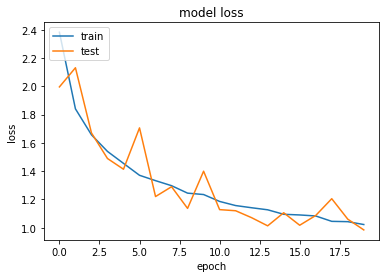

accuracy: 64.28%
191/191 - 14s - 14s/epoch - 74ms/step


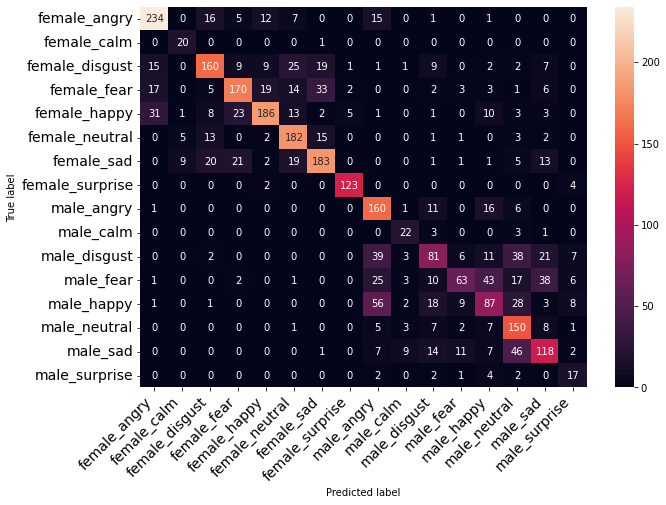

In [ ]:
results = get_results(model_history,model,X_test,y_test, ref.labels.unique())
results.create_plot(model_history)
results.create_results(model)
results.confusion_results(X_test, y_test, ref.labels.unique(), model)

**Model serialisation**

In [ ]:
# Save model and weights
model_name = 'Emotion_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at /content/saved_models/Emotion_Model.h5 


**Model validation**

In [ ]:
# loading json and model architecture
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Model.h5")
print("Loaded model from disk")

# Keras optimiser
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


accuracy: 64.28%


**Melihat Predict value dengan actual value**

In [ ]:
preds = loaded_model.predict(X_test, batch_size=16, verbose=1)

preds=preds.argmax(axis=1)
preds

191/191 [==============================] - 15s 76ms/step


array([3, 0, 0, ..., 8, 6, 5])

In [ ]:
# predictions
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[100:110]

actualvalues  predictedvalues
100     male_neutral     male_neutral
101      female_calm      female_calm
102     female_happy     female_happy
103  female_surprise  female_surprise
104       male_angry     male_disgust
105     male_disgust     male_disgust
106     female_happy     female_happy
107   female_neutral   female_neutral
108       female_sad   female_neutral
109     male_disgust     male_disgust

In [ ]:
# Write out the predictions to disk
finaldf.to_csv('Predictions.csv', index=False)
finaldf.groupby('predictedvalues').count()

actualvalues
predictedvalues              
female_angry              300
female_calm                35
female_disgust            225
female_fear               230
female_happy              232
female_neutral            262
female_sad                254
female_surprise           131
male_angry                311
male_calm                  44
male_disgust              161
male_fear                  97
male_happy                192
male_neutral              304
male_sad                  220
male_surprise              45

In [ ]:
# Get the predictions file
finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

                 precision    recall  f1-score   support

   female_angry       0.78      0.80      0.79       291
    female_calm       0.57      0.95      0.71        21
 female_disgust       0.71      0.62      0.66       260
    female_fear       0.74      0.62      0.67       275
   female_happy       0.80      0.65      0.72       287
 female_neutral       0.69      0.81      0.75       224
     female_sad       0.72      0.67      0.69       275
female_surprise       0.94      0.95      0.95       129
     male_angry       0.51      0.82      0.63       195
      male_calm       0.50      0.76      0.60        29
   male_disgust       0.50      0.39      0.44       208
      male_fear       0.65      0.30      0.41       209
     male_happy       0.45      0.41      0.43       213
   male_neutral       0.49      0.82      0.61       184
       male_sad       0.54      0.55      0.54       215
  male_surprise       0.38      0.61      0.47        28

       accuracy              

**2. Akurasi gender**

191/191 - 13s - 13s/epoch - 71ms/step
0.9622083470259613


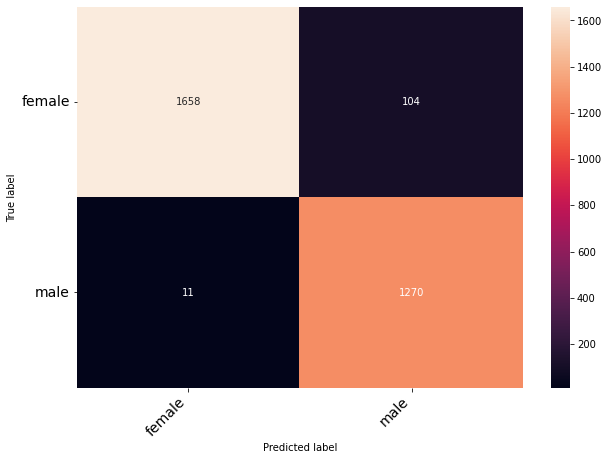

In [ ]:
results.accuracy_results_gender(X_test, y_test, ref.labels.unique(), model)

**3. Akurasi emosi**

0.6638186000657246


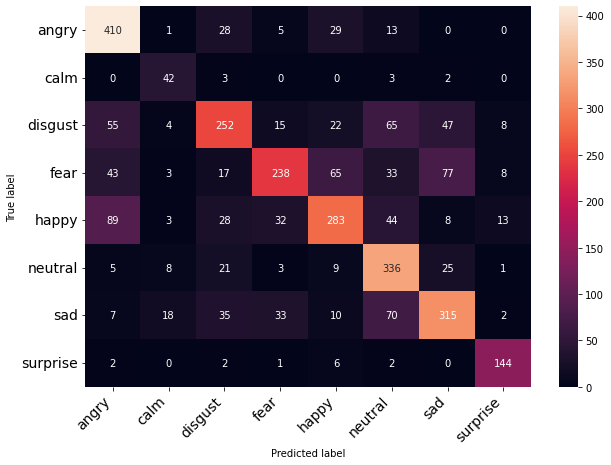

In [ ]:
modidf = pd.read_csv("Predictions.csv")
modidf['actualvalues'] = modidf.actualvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_calm':'calm'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_calm':'calm'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

modidf['predictedvalues'] = modidf.predictedvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_calm':'calm'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_calm':'calm'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

classes = modidf.actualvalues.unique()
classes.sort()

# Confusion matrix
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [ ]:
# Classification report
classes = modidf.actualvalues.unique()
classes.sort()
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

       angry       0.67      0.84      0.75       486
        calm       0.53      0.84      0.65        50
     disgust       0.65      0.54      0.59       468
        fear       0.73      0.49      0.59       484
       happy       0.67      0.57      0.61       500
     neutral       0.59      0.82      0.69       408
         sad       0.66      0.64      0.65       490
    surprise       0.82      0.92      0.86       157

    accuracy                           0.66      3043
   macro avg       0.67      0.71      0.67      3043
weighted avg       0.67      0.66      0.66      3043



**Parameter yang digunakan pada model**

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30, 216, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 30, 216, 32)       1312      
                                                                 
 batch_normalization (BatchN  (None, 30, 216, 32)      128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 30, 216, 32)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 108, 32)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 108, 32)       0     

### **Kesimpulan**

Hasil akurasi:

Pengklasifikasian emosi berdasarkan gender adalah 64%

Pengklasifikasian emosi adalah 66%

Pengklasifikasian gender adalah 96,2%



> Pemisahan gender ternyata merupakan implementasi krusial untuk mengklasifikasikan emosi secara akurat. Setelah mengamati lebih dekat confusion matrix, tampaknya wanita cenderung mengekspresikan emosi dengan cara yang lebih jelas, sementara laki-laki cenderung sangat tenang atau halus. Misalnya, laki-laki yang senang dan marah sering bercampur aduk



